<span style="font-size: 32px;"><u>**SUB ASSIGNMENT 1**</u></span>

<span style="font-size: 18px;">**Main research question:**</span>

<span style="font-size: 18px;">What should be the primary factors that influence the valuation of residential properties?</span>



<span style="font-size: 32px;">#0 Import packages and data</span>

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.ticker as mticker
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import time
from folium.plugins import MarkerCluster
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import kruskal
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_squared_error
from branca.colormap import LinearColormap


# Load csv data
df = pd.read_csv('Housing.csv')

<span style="font-size: 32px;">#1 Exporatory data analysis</span>


#1.1 Create a map to investigate the location of the housings

In [2]:
# Create a map
m = folium.Map(location=[0, 0], zoom_start=2)

# Iterate through coordinates and add markers for each location
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# Save the map
m.save('worldmap_with_scatter.html')

#1.2 Create map of all housings to look for clustered location data

In [5]:
# # Create a map centered at the mean latitude and longitude
# mean_lat = df['latitude'].mean()
# mean_lon = df['longitude'].mean()
# m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# # Create a MarkerCluster layer for your data points
# marker_cluster = MarkerCluster().add_to(m)

# # Adding markers to the MarkerCluster
# for index, row in df.iterrows():
#     folium.Marker(location=[row['latitude'], row['longitude']], popup=f"Median House Value: {row['median_house_value']}").add_to(marker_cluster)

# # Display the map
# display(m)

Create another map to look at the relation of house prices and location

In [6]:
# # Determine the center of the map view based on your sampled data points
# center_lat = df['latitude'].mean()
# center_lon = df['longitude'].mean()

# # Calculate a reasonable zoom level
# zoom = 8

# # Create a Folium map with the specified center and zoom level
# m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom)

# # Create a colormap based on the median house value
# colormap = LinearColormap(
#     colors=['green', 'yellow', 'red'],
#     vmin=df['median_house_value'].min(),
#     vmax=df['median_house_value'].max()
# )

# # Add a heatmap layer to the map
# for index, row in df.iterrows():
#     value = row['median_house_value']
#     color = colormap(value)
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,  
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.6,
#         popup=f"House Value: ${value}, Age: {row['housing_median_age']} years"
#     ).add_to(m)

# # Add the colormap legend to the map
# colormap.add_to(m)

# # Display the map
# m.save('housing_map.html')  

# display(m)

ERROR! Session/line number was not unique in database. History logging moved to new session 329


#1.3 Create a seaborn heatmap to investigate correlation between variables

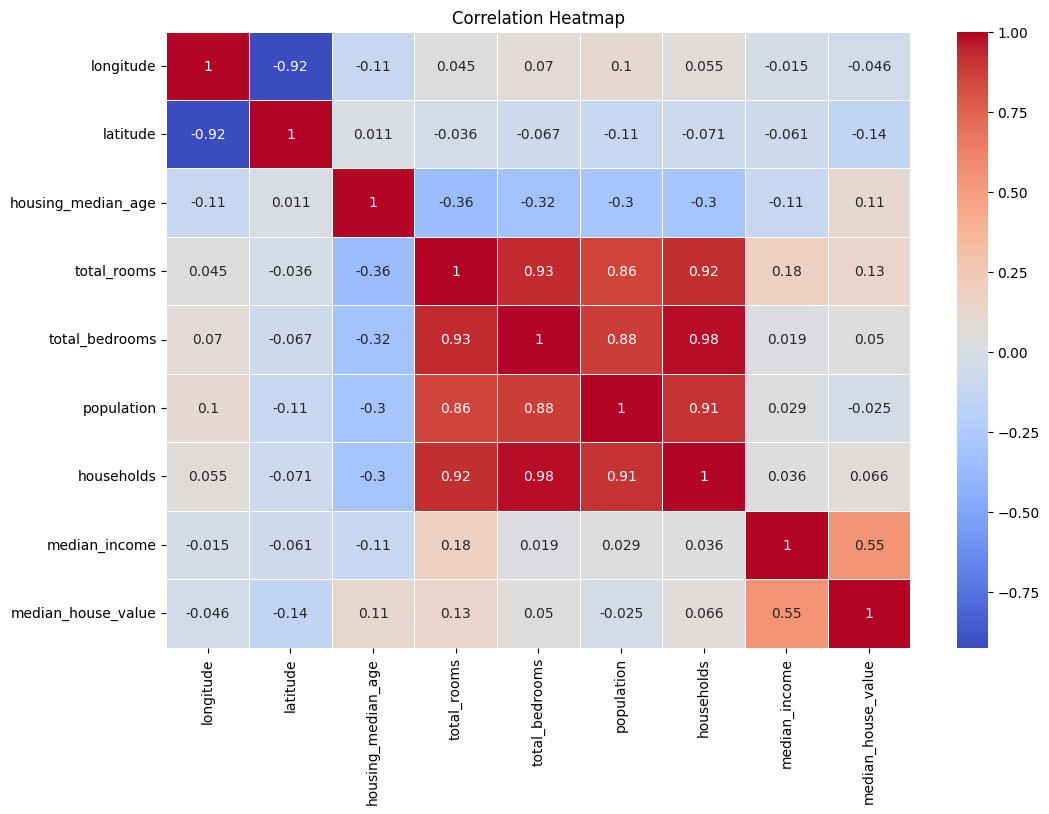

In [8]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#1.4 Look for missing values in the dataframe

In [9]:
# Calculate the count and percentage of missing values for each column
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100)

# Combine the count and percentage into a single DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_count, 'Missing Percentage (%)': missing_percentage})

# Filter columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0]

# Display the result
print(missing_info)

                Missing Values  Missing Percentage (%)
total_bedrooms             207                1.002907


#1.5 Make plots of the data

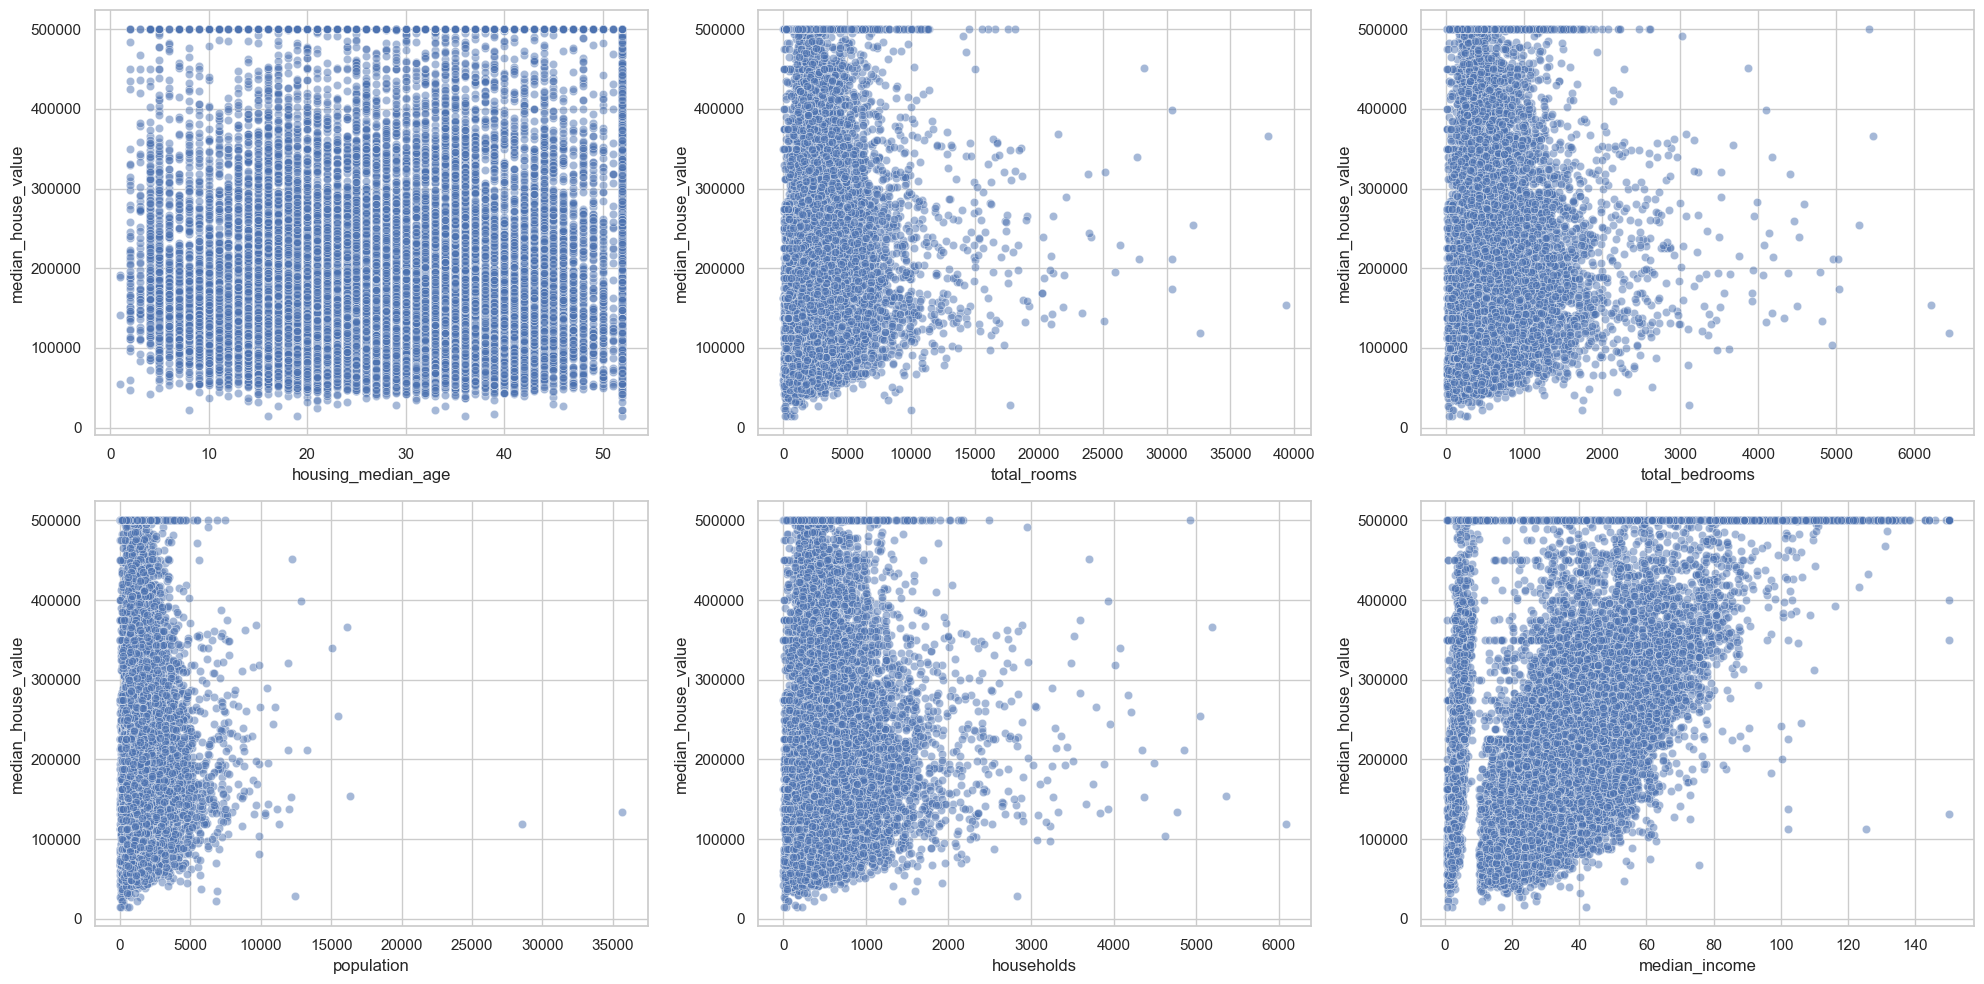

C:\Users\joche\AppData\Local\Temp\ipykernel_46424\4004354999.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette='muted', errorbar=None, ax=axes[0])
C:\Users\joche\AppData\Local\Temp\ipykernel_46424\4004354999.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ocean_proximity', palette='muted', ax=axes[1])


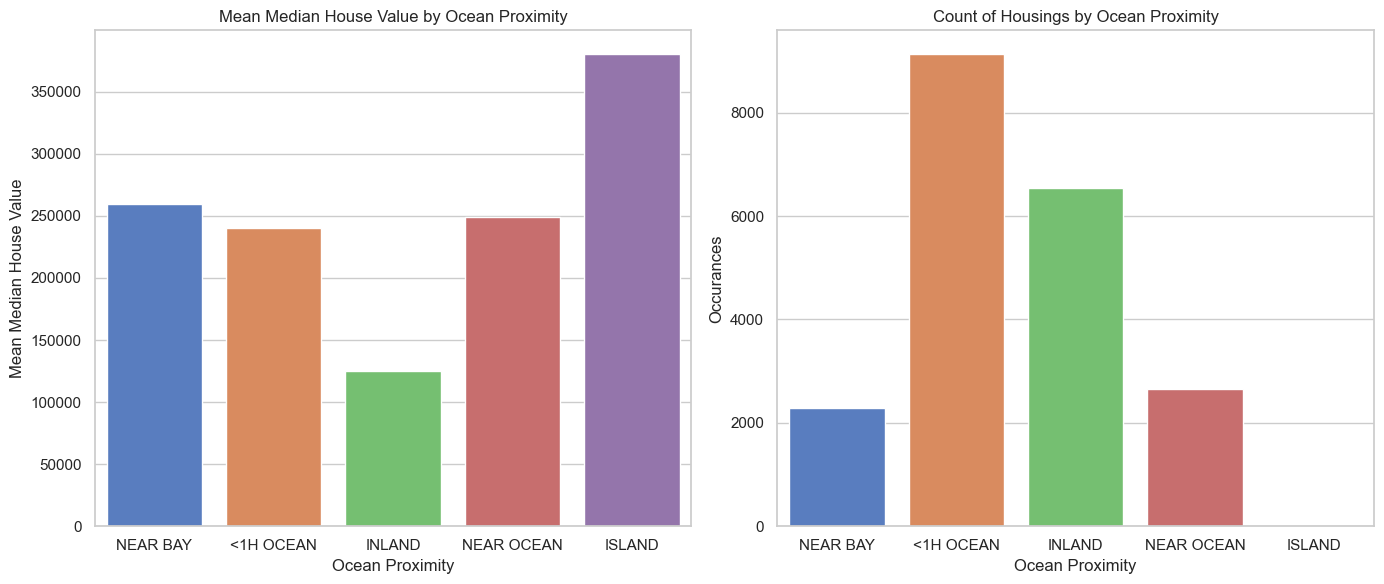

In [10]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a figure with 2*3 scatter subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Plot 'median_house_value' vs. other numeric columns as scatter plots
scatter_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
for i, column in enumerate(scatter_columns):
    row = i // 3  # Determine the row (0 or 1)
    col = i % 3   # Determine the column (0, 1, or 2)
    sns.scatterplot(data=df, x=column, y='median_house_value', ax=axes[row, col], alpha=0.5)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

# Create a figure with two barchart subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Mean Median House Value
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette='muted', errorbar=None, ax=axes[0])
axes[0].set_title('Mean Median House Value by Ocean Proximity')
axes[0].set_xlabel('Ocean Proximity')
axes[0].set_ylabel('Mean Median House Value')

# Subplot 2: Count of Housings
sns.countplot(data=df, x='ocean_proximity', palette='muted', ax=axes[1])
axes[1].set_title('Count of Housings by Ocean Proximity')
axes[1].set_xlabel('Ocean Proximity')
axes[1].set_ylabel('Occurances')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

<span style="font-size: 32px;">#2 Data cleaning</span>

#2.1 Add an extra row containing the county the housing is located in

Due to the long time this code has to run, the resulting dataframe is saved and reread in #2.2. We also uploaded this updated csv file to avoid wasting your time. Therefore, it is recommended to not run 2.1, but continue running th code from 2.2

In [ ]:
# # This can take a while. Geolocater's server has a request limit, therefore a retry option is added to the function. The code uses the time package to delay the retry request after a failed request to avoid the code from crashing

# # Initialize the geolocator with a custom user agent
# geolocator = Nominatim(user_agent="MyGeoApp/1.0 (DaanvanderVeldt1 - research project; daanvanderveldt@hotmail.nl)")

# # Create a function and set a max retries for when communication with the server fails
# def get_county(row, max_retries=3):
#     retries = 0
#     while retries < max_retries:
#         # Request the adress using the coordinates of each row
#         try:
#             location = geolocator.reverse((row['latitude'], row['longitude']), exactly_one=True)
#             if location and location.raw.get('address'):
#             # From each adress extract the county
#                 county = location.raw['address'].get('county', '')
#                 return county
#             # Return empty cell when failing to find a county
#             return ''
#         # In case of a failure due to request limits, wait two seconds and than retry the request
#         except Exception as e:
#             print(f"An error occurred: {e}")
#             retries += 1
#             time.sleep(2)  
#     # In case of 3 failed request for a sinle coordinate, return empty
#     return ''

# # Append a county column using above fuction
# df['county'] = df.apply(get_county, axis=1)


#2.2 Use the average amount of bedrooms per county to replace the nan values

In [12]:
# Load updated csv file
df = pd.read_csv("Housing_updated.csv")

In [13]:
# Calculate the average total_bedrooms by county
county_avg_bedrooms = df.groupby('county')['total_bedrooms'].transform('mean')

# Fill missing values in total_bedrooms with the county average
df['total_bedrooms'].fillna(county_avg_bedrooms, inplace=True)

#2.3 Delete the rows with house pricing of 500.001 and the housing median age of 52 since these are caps in the data

In [14]:
# Delete median house values of 500.001
df = df[df['median_house_value'] != 500001]

# Delete median house age of 52 years
df = df[df['housing_median_age'] != 52]

<span style="font-size: 32px;">#3 Categorical subquestions</span>




Subquestion 1: Testing the significant differences between medians

1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST


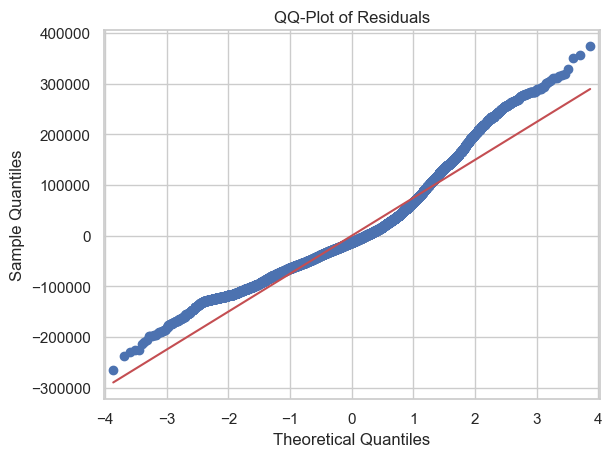

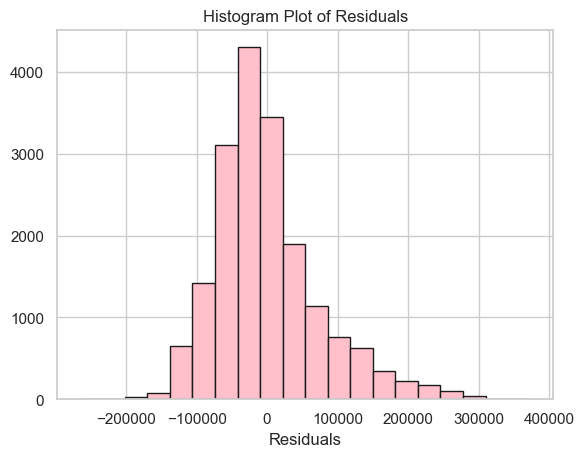

Subsample 1:
Shapiro-Wilk Test Statistic: 0.9451693892478943
p-value: 8.567337595868043e-19
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 2:
Shapiro-Wilk Test Statistic: 0.9405987858772278
p-value: 1.4429109838236856e-19
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 3:
Shapiro-Wilk Test Statistic: 0.9382381439208984
p-value: 5.978431721355669e-20
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 4:
Shapiro-Wilk Test Statistic: 0.9475792050361633
p-value: 2.2893439407905494e-18
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 5:
Shapiro-Wilk Test Statistic: 0.9249566197395325
p-value: 6.3698354724450225e-22
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 6:
Shapiro-Wilk Test Statistic: 0.9343782663345337
p-value: 1.4907914288525226e-20
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 7:
Shapiro-Wilk Test Statistic: 0.9313943982124329

C:\Users\joche\AppData\Local\Temp\ipykernel_46424\1473557859.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='median_house_value', y='county', data=data_filtered, palette='husl', ax=ax)


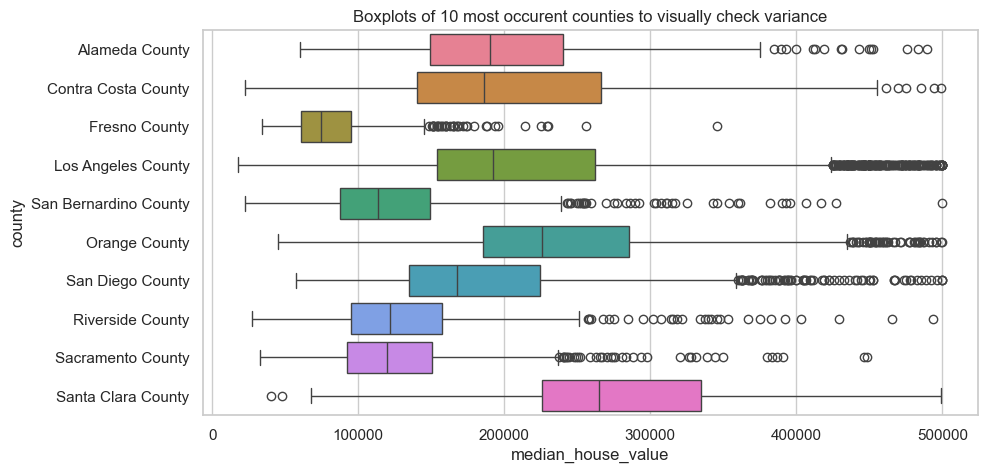

Bartlett's test: Variances are not equal (reject H0)
Levene's test: Variances are not equal (reject H0)


3.   SINCE THE ANOVA ASSUMPTIONS ARE NOT MET, THE KRUSKALL-WALLIS TEST IS DONE
Kruskal-Wallis test: Groups have different medians (reject H0)
Kruskal-Wallis Statistic: 3872.7116203906917
P-Value: 0.0


In [15]:
"""Check for normallity"""
print('1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST')
# Fit the linear model
income_segment_lm = smf.ols('median_house_value ~ county', data=df).fit()
residuals = income_segment_lm.resid

# Create a QQ-plot
sm.qqplot(residuals, stats.norm, line='s')
plt.title('QQ-Plot of Residuals')
plt.show()

# Histogram plot of the residuals
plt.hist(residuals, bins=20, facecolor='pink', edgecolor='k')
plt.title('Histogram Plot of Residuals')
plt.xlabel('Residuals')
plt.show()

# Generate random subsamples
subsample_size = 1000
num_subsamples = 10 

for i in range(num_subsamples):
    # Randomly sample 'subsample_size' data points 
    random_sample = np.random.choice(residuals, subsample_size, replace=False)

    # Perform the Shapiro-Wilk test for normality on the random sample
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(random_sample)

    print(f'Subsample {i+1}:')
    print(f'Shapiro-Wilk Test Statistic: {shapiro_test_statistic}')
    print(f'p-value: {shapiro_p_value}')

    # Evaluate result
    if shapiro_p_value > 0.05:
        print("Residuals appear to be normally distributed (p > 0.05)")
    else:
        print("Residuals do not appear to be normally distributed (p <= 0.05)")
    print()
print()
print()

"""Check for equal variance"""
print('2.   VARIANCE IS CHECKED VISUALY AND BY DOING BARTLETT AND LEVENE TEST')

# Visually analyze the segments using a boxplot to check
top_categories = df['county'].value_counts().nlargest(10).index
data_filtered = df[df['county'].isin(top_categories)]
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='median_house_value', y='county', data=data_filtered, palette='husl', ax=ax)
plt.title('Boxplots of 10 most occurent counties to visually check variance')
plt.show()

# Extract the data for each county segment
county_groups = [group['median_house_value'] for name, group in data_filtered.groupby('county')]

# Perform Bartlett's test
statistic, p_value = bartlett(*county_groups)

# Check the results
alpha = 0.05
if p_value < alpha:
    print("Bartlett's test: Variances are not equal (reject H0)")
else:
    print("Bartlett's test: Variances are equal (fail to reject H0)")

# Perform Levene's test
statistic, p_value = levene(*county_groups)

# Check the results
alpha = 0.05
if p_value < alpha:
    print("Levene's test: Variances are not equal (reject H0)")
else:
    print("Levene's test: Variances are equal (fail to reject H0)")
print()
print()

""""Do a Kurskal-Wallis test since the variance is unequal and the data is not normally distributed"""
print('3.   SINCE THE ANOVA ASSUMPTIONS ARE NOT MET, THE KRUSKALL-WALLIS TEST IS DONE')
# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*county_groups)

# Check the results
alpha = 0.05
if p_value < alpha:
    print("Kruskal-Wallis test: Groups have different medians (reject H0)")
else:
    print("Kruskal-Wallis test: No significant difference in medians (fail to reject H0)")

# Print the test statistic and p-value
print("Kruskal-Wallis Statistic:", statistic)
print("P-Value:", p_value)


Subquestion 1: Linear regression

1.    CALCULATE VARIABLES
Intercept (b0):  3041.8270182338892
Coefficients (b1):  [4270.39924441]
Coefficient of Determination (R-squared):  0.34963044474027716


2. PERFORM LINEAR REGRESSION
Predicted values (y):  [195209.79301685 195209.79301685 195209.79301685 ...  41475.42021796
  41475.42021796  41475.42021796]
MSE =  5925794033.697847
MSR =  58478644828306.69
F-statistic (F): 9868.49095593937
F-statistic (9868.49095593937) is not greater than the critical value (nan).
Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.


C:\Users\joche\AppData\Local\Temp\ipykernel_46424\2379348580.py:8: FutureWarning: The provided callable <function mean at 0x000001DD5CBE0670> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  df['average_median_house_value'] = df.groupby('county')['median_house_value'].transform(np.mean)
C:\Users\joche\AppData\Local\Temp\ipykernel_46424\2379348580.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_median_house_value'] = df.groupby('county')['median_house_value'].transform(np.mean)
C:\Users\joche\AppData\Local\Temp\ipykernel_46424\2379348580.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

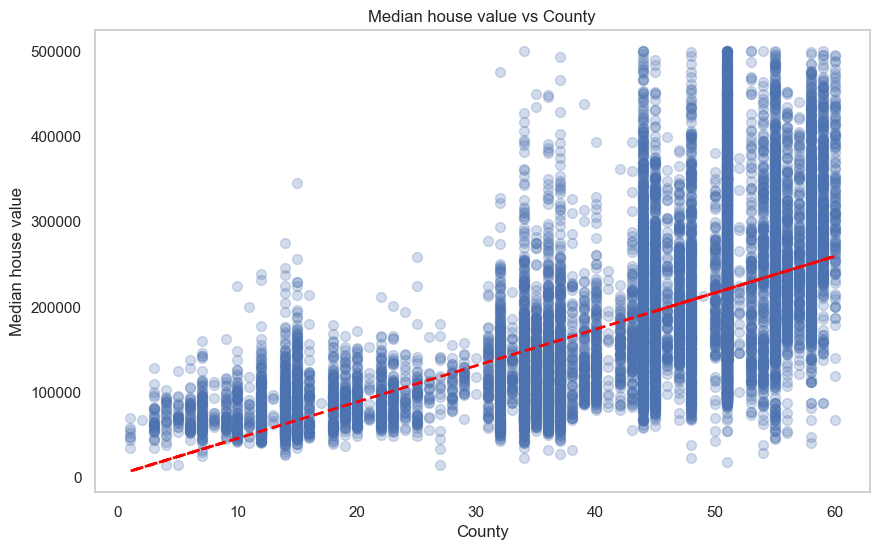

In [16]:
print('1.    CALCULATE VARIABLES')


# Remove rows with missing 'county' values
df = df[df['county'].notna()]

# Group per county and calculate the mean median house value
df['average_median_house_value'] = df.groupby('county')['median_house_value'].transform(np.mean)

# Create a new column where these counties are ranked with numbers
df['county_numeric'] = df['average_median_house_value'].rank(ascending=True, method='dense')

# Drop not loger needed column
df = df.drop('average_median_house_value', axis=1)

# Extract data
x_data = df['county_numeric']
y_data = df['median_house_value']

# Reshape x_data to a 2D array
x_data = x_data.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x_data, y_data)

# Get the intercept and coefficients
b0 = model.intercept_
b1 = model.coef_

print("Intercept (b0): ", b0)
print("Coefficients (b1): ", b1)

# Calculate the coefficient of determination (R-squared)
r_sq = model.score(x_data, y_data)
print("Coefficient of Determination (R-squared): ", r_sq)

print()
print()

print('2. PERFORM LINEAR REGRESSION')

# Predict median house values based on one-hot encoded county data
y_pred = model.predict(x_data)
print("Predicted values (y): ", y_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_data, y_pred)
print("MSE = ", MSE)

# Calculate Sum of Squares (SSR)
SSR = 0
y_avg = np.mean(y_data)
for i in y_pred:
    SSR = SSR + ((i - y_avg) * (i - y_avg))
MSR = SSR / 1
print("MSR = ", MSR)

# Calculate the F-statistic
F = MSR / MSE
print("F-statistic (F):", F)

# Define the degrees of freedom
dfn = len(x_data)  # Degrees of freedom for the numerator (predictors)
dfd = len(y_data) - dfn  # Degrees of freedom for the denominator

# Set the alpha level
alpha = 0.05

# Calculate the critical F-value
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Calculate the F-statistic
F = MSR / MSE

# Compare F-statistic to critical value
if F > critical_value:
    print(f"F-statistic ({F}) is greater than the critical value ({critical_value}).")
    print("Reject the null hypothesis (H0) - The regression model is statistically significant.")
else:
    print(f"F-statistic ({F}) is not greater than the critical value ({critical_value}).")
    print("Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.")

# Create a scatter plot of data
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.25, s=50)
plt.title('Median house value vs County')
plt.xlabel('County')
plt.ylabel('Median house value')
plt.grid()

# Calculate the corresponding y-values using the regression equation
y_values = b0 + b1 * x_data

# Overlay the regression line
plt.plot(x_data, y_values, 'k--', lw=2, color='red')
plt.show()

Subquestion 2: Testing the significant differences between medians

1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST


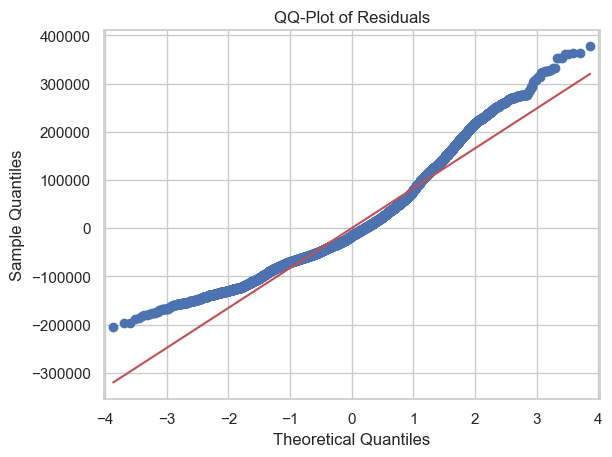

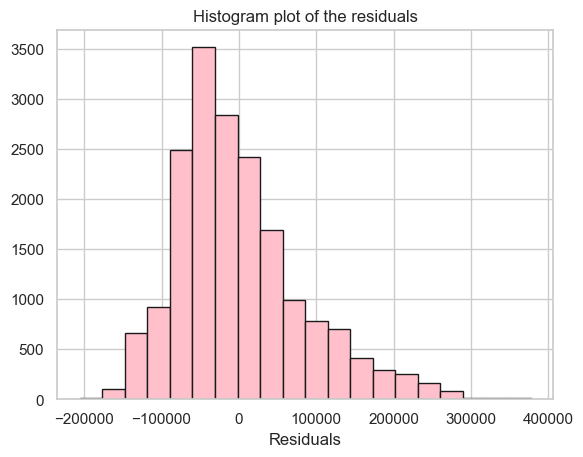

Subsample 1:
Shapiro-Wilk Test Statistic: 0.9577548503875732
p-value: 2.1649348186097164e-16
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 2:
Shapiro-Wilk Test Statistic: 0.9393329620361328
p-value: 8.967911568971181e-20
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 3:
Shapiro-Wilk Test Statistic: 0.9385950565338135
p-value: 6.819366150296951e-20
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 4:
Shapiro-Wilk Test Statistic: 0.9403709173202515
p-value: 1.3238042134464094e-19
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 5:
Shapiro-Wilk Test Statistic: 0.9387720227241516
p-value: 7.280706749902795e-20
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 6:
Shapiro-Wilk Test Statistic: 0.9365927577018738
p-value: 3.282257840489242e-20
Residuals do not appear to be normally distributed (p <= 0.05)

Subsample 7:
Shapiro-Wilk Test Statistic: 0.9482702016830444
p

C:\Users\joche\AppData\Local\Temp\ipykernel_46424\146119925.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='median_house_value', y='ocean_proximity', data=df, palette='husl', ax=ax)


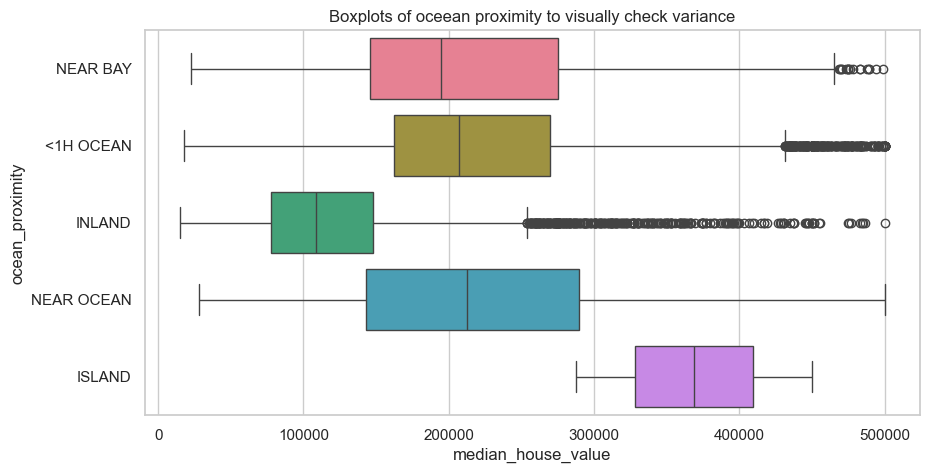

Bartlett's test: Variances are not equal (reject H0)
Levene's test: Variances are not equal (reject H0)


3.   SINCE THE ANOVA ASSUMPTIONS ARE NOT MET, THE KRUSKALL-WALLIS TEST IS DONE
Kruskal-Wallis test: Groups have different medians (reject H0)
Kruskal-Wallis Statistic: 2676.4517247232584
P-Value: 0.0


In [17]:
"""Check for normallity"""
print('1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST')

# Fit the linear model
income_segment_lm = smf.ols('median_house_value ~ ocean_proximity', data = df).fit()
residuals = income_segment_lm.resid

# Create a QQ-plot
sm.qqplot(residuals, stats.norm, line='s')
plt.title('QQ-Plot of Residuals')
plt.show()

# Histogram plot of the residuals
plt.hist(residuals, bins = 20, facecolor = 'pink', edgecolor = 'k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.show()

# Generate random subsamples
subsample_size = 1000
num_subsamples = 10 

for i in range(num_subsamples):
    # Randomly sample 'subsample_size' data points from your dataset
    random_sample = np.random.choice(residuals, subsample_size, replace=False)

    # Perform the Shapiro-Wilk test for normality on the random sample
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(random_sample)

    print(f'Subsample {i+1}:')
    print(f'Shapiro-Wilk Test Statistic: {shapiro_test_statistic}')
    print(f'p-value: {shapiro_p_value}')

    if shapiro_p_value > 0.05:
        print("Residuals appear to be normally distributed (p > 0.05)")
    else:
        print("Residuals do not appear to be normally distributed (p <= 0.05)")
    print()
print()
print()

"""Check for equal variance"""
print('2.   VARIANCE IS CHECKED VISUALY AND BY DOING BARTLETT AND LEVENE TEST')

# Visually analyze the segments using a boxplot to check
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='median_house_value', y='ocean_proximity', data=df, palette='husl', ax=ax)
plt.title('Boxplots of oceean proximity to visually check variance')
plt.show()

# Extract the data for each county segment
proximity_groups = [group['median_house_value'] for name, group in data_filtered.groupby('ocean_proximity')]

# Perform Bartlett's test
statistic, p_value = bartlett(*proximity_groups)

# Check the results
alpha = 0.05
if p_value < alpha:
    print("Bartlett's test: Variances are not equal (reject H0)")
else:
    print("Bartlett's test: Variances are equal (fail to reject H0)")

# Perform Levene's test
statistic, p_value = levene(*proximity_groups)

# Check the results
alpha = 0.05
if p_value < alpha:
    print("Levene's test: Variances are not equal (reject H0)")
else:
    print("Levene's test: Variances are equal (fail to reject H0)")
print()
print()

""""Do a Kurskal-Wallis test since the variance is unequal and the data is not normally distributed"""
print('3.   SINCE THE ANOVA ASSUMPTIONS ARE NOT MET, THE KRUSKALL-WALLIS TEST IS DONE')

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*proximity_groups)

# Check the results
alpha = 0.05
if p_value < alpha:
    print("Kruskal-Wallis test: Groups have different medians (reject H0)")
else:
    print("Kruskal-Wallis test: No significant difference in medians (fail to reject H0)")

# Print the test statistic and p-value
print("Kruskal-Wallis Statistic:", statistic)
print("P-Value:", p_value)

Subquestion 2: Linear regression

1.    CALCULATE VARIABLES
Intercept (b0):  114838.74781743856
Coefficients (b1):  [37235.89434986]
Coefficient of Determination (R-squared):  0.1393515155065116


2. PERFORM LINEAR REGRESSION
Predicted values (y):  [226546.43086703 226546.43086703 226546.43086703 ... 152074.6421673
 152074.6421673  152074.6421673 ]
MSE =  7841734923.286701
MSR =  23307717918110.83
F-statistic (F): 2972.265467542976
F-statistic (2972.265467542976) is not greater than the critical value (nan).
Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.


C:\Users\joche\AppData\Local\Temp\ipykernel_46424\4061327850.py:102: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_data, y_values, 'k--', lw=2, color='red')


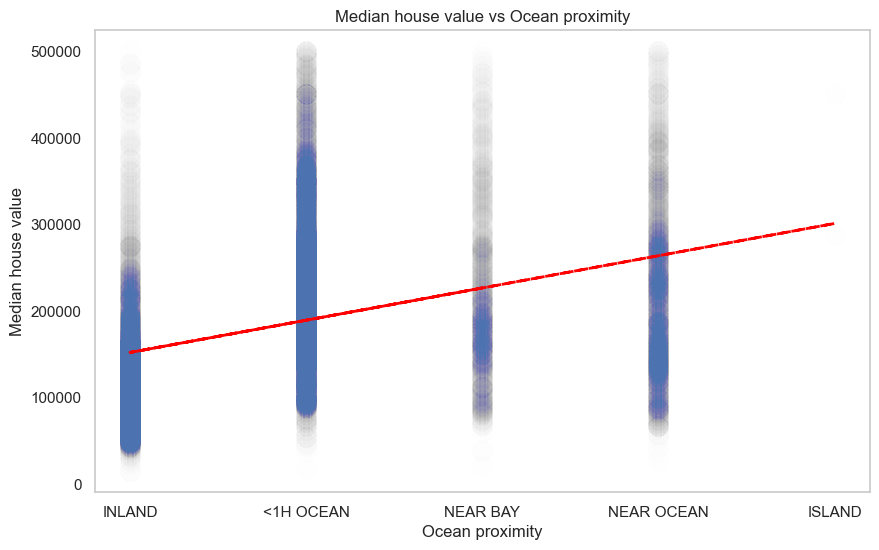

In [18]:
print('1.    CALCULATE VARIABLES')

# Number categories based on their ocean proximity
category_to_numeric = {
    'ISLAND': 5,
    'NEAR OCEAN': 4,
    'NEAR BAY': 3,
    '<1H OCEAN': 2,
    'INLAND': 1
}

# Use the map function to create a new column with unique numeric values
df['ocean_proximity_numeric'] = df['ocean_proximity'].map(category_to_numeric)

# Extract the data
x_data = df['ocean_proximity_numeric']
y_data = df['median_house_value']

# Reshape x_data to a 2D array
x_data = x_data.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x_data, y_data)

# Get the intercept and coefficients
b0 = model.intercept_
b1 = model.coef_

print("Intercept (b0): ", b0)
print("Coefficients (b1): ", b1)

# Calculate the coefficient of determination (R-squared)
r_sq = model.score(x_data, y_data)
print("Coefficient of Determination (R-squared): ", r_sq)

print()
print()

print('2. PERFORM LINEAR REGRESSION')

# Predict median house values based on one-hot encoded county data
y_pred = model.predict(x_data)
print("Predicted values (y): ", y_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_data, y_pred)
print("MSE = ", MSE)

# Calculate Sum of Squares  (SSR)
SSR = 0
y_avg = np.mean(y_data)
for i in y_pred:
    SSR = SSR + ((i - y_avg) * (i - y_avg))
MSR = SSR / 1
print("MSR = ", MSR)

# Calculate the F-statistic
F = MSR / MSE
print("F-statistic (F):", F)

# Define the degrees of freedom
dfn = len(x_data)  # Degrees of freedom for the numerator (predictors)
dfd = len(y_data) - dfn  # Degrees of freedom for the denominator

# Set the alpha level
alpha = 0.05

# Calculate the critical F-value
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Calculate the F-statistic
F = MSR / MSE

# Compare F-statistic to critical value
if F > critical_value:
    print(f"F-statistic ({F}) is greater than the critical value ({critical_value}).")
    print("Reject the null hypothesis (H0) - The regression model is statistically significant.")
else:
    print(f"F-statistic ({F}) is not greater than the critical value ({critical_value}).")
    print("Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.005, s=200)
plt.title('Median house value vs Ocean proximity')
plt.xlabel('Ocean proximity')
plt.ylabel('Median house value')
plt.grid()

# Set the x-axis labels to the corresponding ocean proximity categories using the category_to_numeric dictionary
x_labels = [key for key, value in category_to_numeric.items()]
x_tick_positions = [value for key, value in category_to_numeric.items()]
plt.xticks(x_tick_positions, x_labels)

# Calculate the corresponding y-values using the regression equation
y_values = b0 + b1 * x_data

# Overlay the regression line
plt.plot(x_data, y_values, 'k--', lw=2, color='red')
plt.show()

<span style="font-size: 32px;">#4 Linear regression</span>

Subquestion 3: Median income effect on median house value

1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST


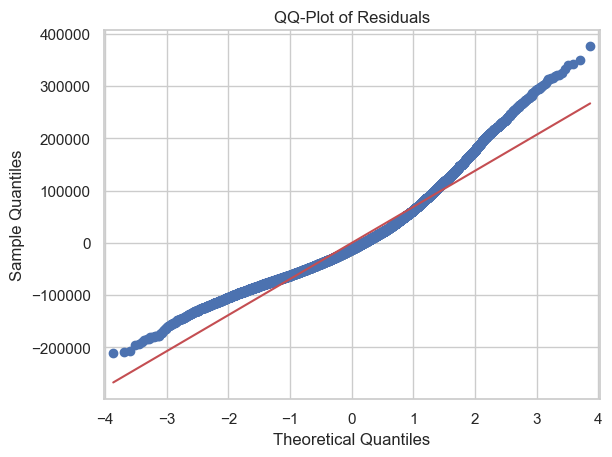

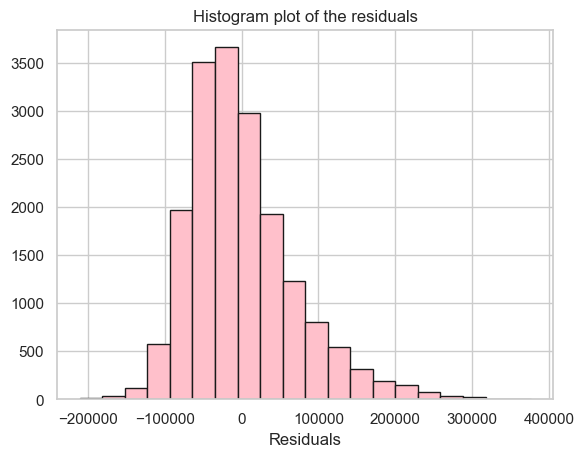

Shapiro-Wilk Test Statistic: 0.9442325830459595
p-value: 0.0
Residuals do not appear to be normally distributed (p <= 0.05)


2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST


c:\Users\joche\anaconda3\python\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


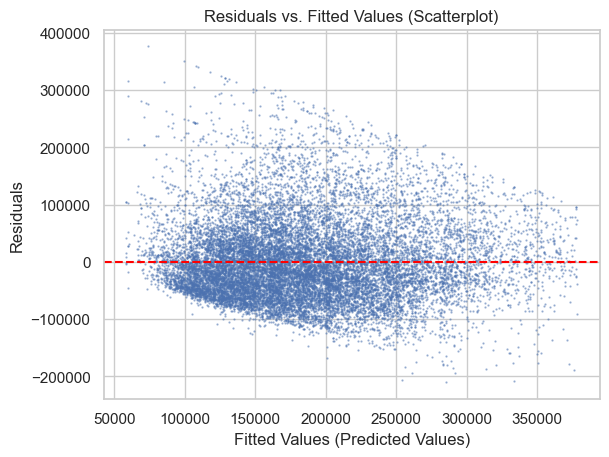

Breusch-Pagan Test Statistic: 38.378096812985824
p-value: 5.828288542045402e-10
Reject the null hypothesis - There is evidence of heteroscedasticity.


3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST


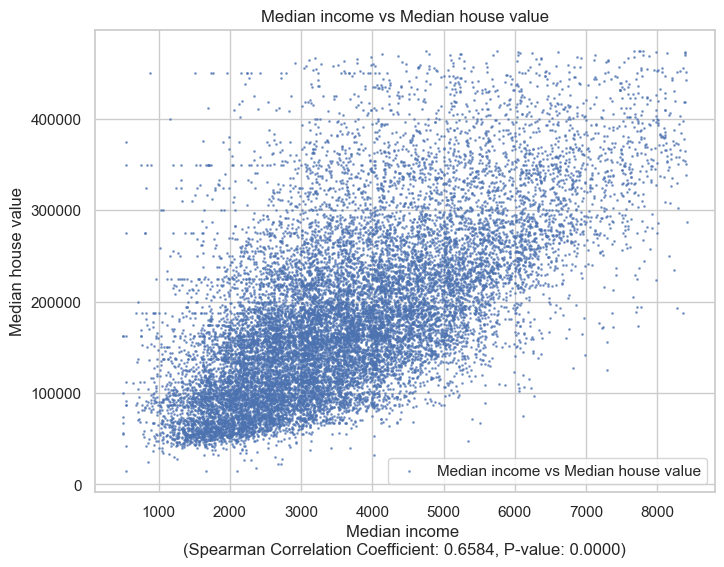

Correlation Coefficient: 0.6584, Interpretation: Strong positive correlation
Following the p-value and an alpha of 0.05, we reject the null hypothesis. We can conclude that there is a significant relationship.


4.   LINEAR REGRESSION IS CALCULATED
Intercept (b0):  38292.41025081833
Coefficients (b1):  [40.40861563]
Coefficient of Determination (R-squared):  0.42965324071613253
Predicted values (y):  [374702.2171219  373740.49206982 122358.49421452 ... 106987.05682758
 113743.37736148 134812.42955273]
MSE =  4771583332.871348
MSR =  65143594286624.58
F-statistic (F): 13652.406285739908
F-statistic (13652.406285739908) is greater than the critical value (3.8419654968806896).
Reject the null hypothesis (H0) - The regression model is statistically significant.


C:\Users\joche\AppData\Local\Temp\ipykernel_46424\2011851352.py:212: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_data, y_values, 'k--', lw=2, color='red')


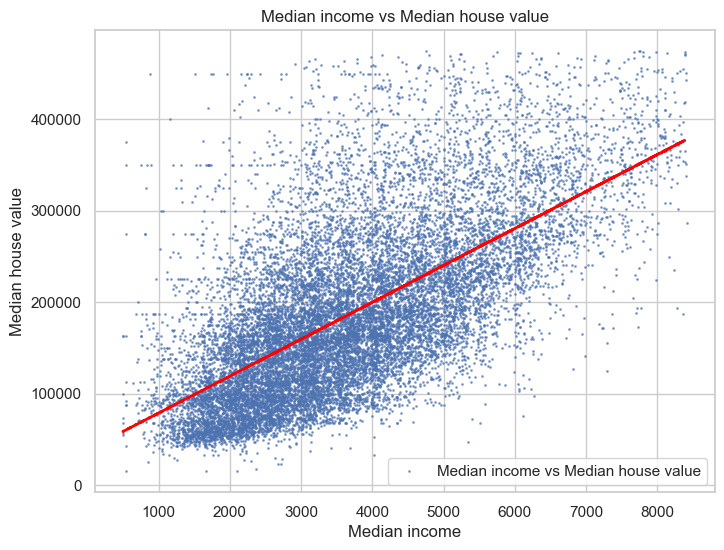

In [19]:
"""Eliminate outliers"""
# Set to right amount
df['median_income'] = df['median_income'] * 1000

# Define a z-score threshold for outlier detection
z_score_threshold = 3 

# Calculate the z-scores for 'median_income' and 'median_house_value'
z_scores_income = np.abs(stats.zscore(df['median_income']))
z_scores_house_value = np.abs(stats.zscore(df['median_house_value']))

# Detect outliers for both variables based on the z-scores
outliers_income = np.where(z_scores_income > z_score_threshold)
outliers_house_value = np.where(z_scores_house_value > z_score_threshold)

# Combine the outlier indices from both variables
outliers = np.union1d(outliers_income, outliers_house_value)

# Remove outliers from the DataFrame
df1 = df.drop(df.index[outliers])

"""Check for normallity"""
print('1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST')
# Fit your linear regression model
income_segment_lm = sm.OLS(df1['median_house_value'], sm.add_constant(df1['median_income'])).fit()
residuals = income_segment_lm.resid
fitted_values = income_segment_lm.fittedvalues

# Create a QQ-plot
sm.qqplot(residuals, stats.norm, line='s')
plt.title('QQ-Plot of Residuals')
plt.show()

# Histogram plot of the residuals
plt.hist(residuals, bins = 20, facecolor = 'pink', edgecolor = 'k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test_statistic}')
print(f'p-value: {shapiro_p_value}')

# Evaluate the results
if shapiro_p_value > 0.05:
    print("Residuals appear to be normally distributed (p > 0.05)")
else:
    print("Residuals do not appear to be normally distributed (p <= 0.05)")
    

"""Check for equal variance"""
print()
print()
print('2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST')

# Create a scatterplot of residuals vs. fitted values
plt.scatter(fitted_values, residuals, alpha=0.5, s=0.4)
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Scatterplot)')

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Perform the Breusch-Pagan test
bp_test_statistic, bp_p_value, f_statistic, f_p_value = het_breuschpagan(residuals, income_segment_lm.model.exog)

print(f'Breusch-Pagan Test Statistic: {bp_test_statistic}')
print(f'p-value: {bp_p_value}')

 # Evaluate the results
if bp_p_value < 0.05:
    print("Reject the null hypothesis - There is evidence of heteroscedasticity.")
else:
    print("Fail to reject the null hypothesis - There is no evidence of heteroscedasticity.")


"""Spearman correlation test"""
print()
print()
# Spearman correlation test
print('3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST')
spearman_corr, p_value = stats.spearmanr(df1['median_income'], df1['median_house_value'])

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df1['median_income'], df1['median_house_value'], label='Median income vs Median house value', alpha=0.6, s=1)
ax.set_title('Median income vs Median house value')
ax.set_xlabel(f'Median income \n(Spearman Correlation Coefficient: {spearman_corr:.4f}, P-value: {p_value:.4f})')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)
plt.show(block=False)

# Interpret the result
interpretation = ''
if spearman_corr >= 0.8:
    interpretation = "Very strong positive correlation"
elif 0.6 <= spearman_corr < 0.8:
    interpretation = "Strong positive correlation"
elif 0.4 <= spearman_corr < 0.6:
    interpretation = "Moderate positive correlation"
elif 0.2 <= spearman_corr < 0.4:
    interpretation = "Weak positive correlation"
elif 0.0 <= spearman_corr < 0.2:
    interpretation = "Very weak positive correlation"
elif spearman_corr <= -0.8:
    interpretation = "Very strong negative correlation"
elif -0.8 <= spearman_corr < -0.6:
    interpretation = "Strong negative correlation"
elif -0.6 <= spearman_corr < -0.4:
    interpretation = "Moderate negative correlation"
elif -0.4 <= spearman_corr < -0.2:
    interpretation = "Weak negative correlation"
elif -0.2 <= spearman_corr < 0.0:
    interpretation = "Very weak negative correlation"
else:
    interpretation = "No significant correlation"

print(f"Correlation Coefficient: {spearman_corr:.4f}, Interpretation: {interpretation}")

# Interpretation based on p-value
if p_value < 0.05:
    print("Following the p-value and an alpha of 0.05, we reject the null hypothesis. We can conclude that there is a significant relationship.")
else:
    print("Following the p-value and an alpha of 0.05, we fail to reject the null hypothesis. We can conclude that there is not a significant relationship.")

"""Linear regression"""
print()
print()
print('4.   LINEAR REGRESSION IS CALCULATED')
# Set the data
x_data = df1['median_income']
y_data = df1['median_house_value']

# Reshape x_data to a 2D array
x_data = x_data.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x_data, y_data)

# Get the intercept and coefficients
b0 = model.intercept_
b1 = model.coef_

print("Intercept (b0): ", b0)
print("Coefficients (b1): ", b1)

# Calculate the coefficient of determination (R-squared)
r_sq = model.score(x_data, y_data)
print("Coefficient of Determination (R-squared): ", r_sq)

# Predict median house values based on data
y_pred = model.predict(x_data)
print("Predicted values (y): ", y_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_data, y_pred)
print("MSE = ", MSE)

# Calculate Sum of Squares (SSR)
SSR = 0
y_avg = np.mean(y_data)
for i in y_pred:
    SSR = SSR + ((i - y_avg) * (i - y_avg))
MSR = SSR / 1
print("MSR = ", MSR)

# Calculate the F-statistic
F = MSR / MSE
print("F-statistic (F):", F)

# Define the degrees of freedom
dfn = 1  # Degrees of freedom for the numerator (predictors)
dfd = len(df) - 2  # Degrees of freedom for the denominator

# Set the alpha level
alpha = 0.05

# Calculate the critical F-value
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Calculate the F-statistic
F = MSR / MSE

# Compare F-statistic to critical value
if F > critical_value:
    print(f"F-statistic ({F}) is greater than the critical value ({critical_value}).")
    print("Reject the null hypothesis (H0) - The regression model is statistically significant.")
else:
    print(f"F-statistic ({F}) is not greater than the critical value ({critical_value}).")
    print("Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.")

# Create a scatter plot 
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df1['median_income'], df1['median_house_value'], label='Median income vs Median house value', alpha=0.6, s=1)
ax.set_title('Median income vs Median house value')
ax.set_xlabel('Median income')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)

# Calculate the corresponding y-values using the regression equation
y_values = b0 + b1 * x_data

# Overlay the regression line
plt.plot(x_data, y_values, 'k--', lw=2, color='red')
plt.show()

Subquestion 4

1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST


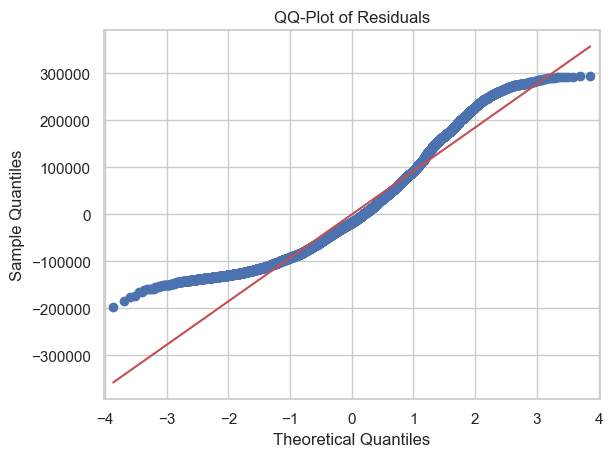

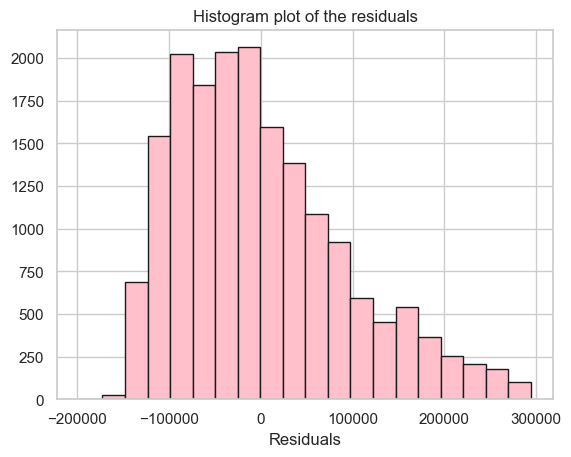

Shapiro-Wilk Test Statistic: 0.9456183314323425
p-value: 0.0
Residuals do not appear to be normally distributed (p <= 0.05)


2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST


c:\Users\joche\anaconda3\python\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


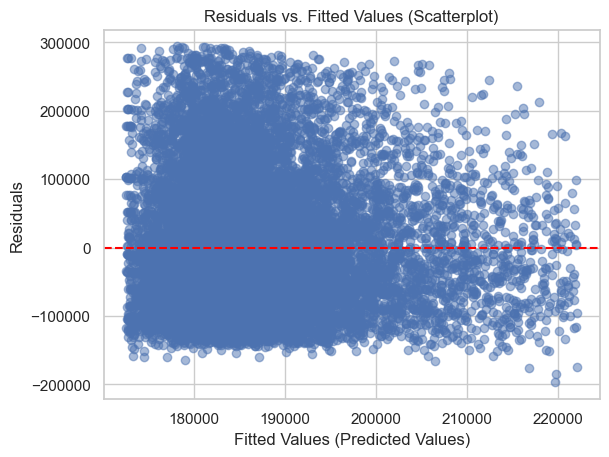

Breusch-Pagan Test Statistic: 5.839723961264447
p-value: 0.015668284579707252
Reject the null hypothesis - There is evidence of heteroscedasticity.
3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST


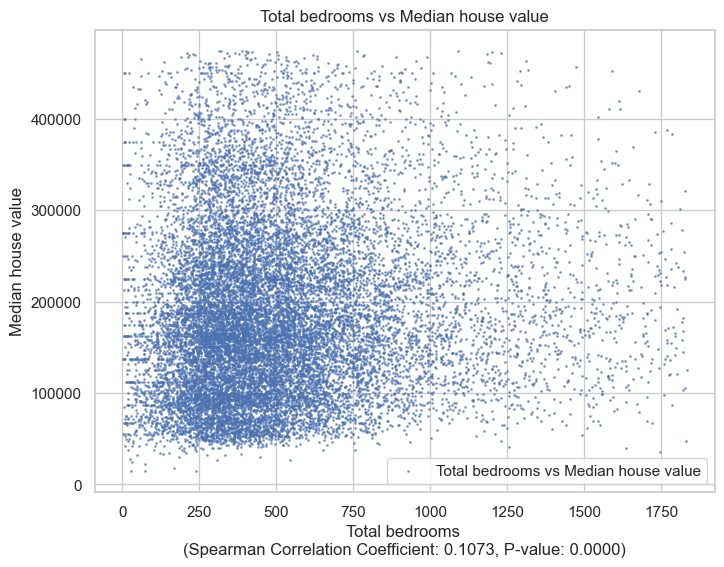

Correlation Coefficient: 0.1073, Interpretation: Very weak positive correlation
Following the p-value and an alpha of 0.05, we reject the null hypothesis. We can conclude that there is a significant relationship.


4.   LINEAR REGRESSION IS CALCULATED
Intercept (b0):  172468.979842139
Coefficients (b1):  [27.07127746]
Coefficient of Determination (R-squared):  0.008188237324174952
Predicted values (y):  [175961.17463417 202409.81271021 190471.37935142 ... 185598.54940906
 183541.13232228 189144.886756  ]
MSE =  8553633180.0173855
MSR =  1264616588648.0137
F-statistic (F): 147.84554843927071
F-statistic (147.84554843927071) is greater than the critical value (3.8419654968806896).
Reject the null hypothesis (H0) - The regression model is statistically significant.


C:\Users\joche\AppData\Local\Temp\ipykernel_46424\3330649026.py:210: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_data, y_values, 'k--', lw=2, color='red')


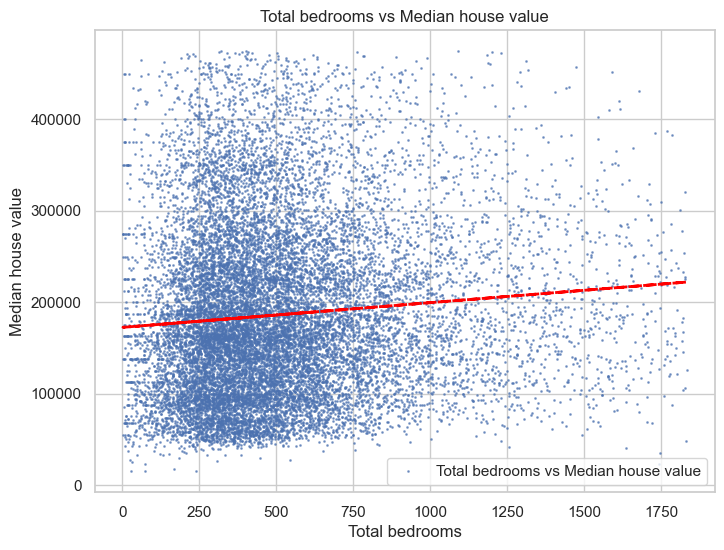

In [20]:
"""Eliminate outliers"""
# Define a z-score threshold for outlier detection
z_score_threshold = 3 
df.dropna(subset=['total_bedrooms'], inplace=True)

# Calculate the z-scores for 'total_bedrooms' and 'median_house_value'
z_scores_bedrooms = np.abs(stats.zscore(df['total_bedrooms']))
z_scores_house_value = np.abs(stats.zscore(df['median_house_value']))

# Detect outliers for both variables based on the z-scores
outliers_bedrooms = np.where(z_scores_bedrooms > z_score_threshold)
outliers_house_value = np.where(z_scores_house_value > z_score_threshold)

# Combine the outlier indices from both variables
outliers = np.union1d(outliers_bedrooms, outliers_house_value)

# Remove outliers from the DataFrame
df2 = df.drop(df.index[outliers])

"""Check for normallity"""
print('1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST')

# Fit your linear regression model
bedrooms_segment_lm = sm.OLS(df2['median_house_value'], sm.add_constant(df2['total_bedrooms'])).fit()
residuals = bedrooms_segment_lm.resid
fitted_values = bedrooms_segment_lm.fittedvalues

# Create a QQ-plot
sm.qqplot(residuals, stats.norm, line='s')
plt.title('QQ-Plot of Residuals')
plt.show()

# Histogram plot of the residuals
plt.hist(residuals, bins=20, facecolor='pink', edgecolor='k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.show()

# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test_statistic}')
print(f'p-value: {shapiro_p_value}')

# Evaluate the results
if shapiro_p_value > 0.05:
    print("Residuals appear to be normally distributed (p > 0.05)")
else:
    print("Residuals do not appear to be normally distributed (p <= 0.05)")

"""Check for equal variance"""
print()
print()
print('2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST')

# Create a scatterplot of residuals vs. fitted values
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Scatterplot)')

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

# Perform the Breusch-Pagan test
bp_test_statistic, bp_p_value, f_statistic, f_p_value = het_breuschpagan(residuals, bedrooms_segment_lm.model.exog)

print(f'Breusch-Pagan Test Statistic: {bp_test_statistic}')
print(f'p-value: {bp_p_value}')

# Evaluate the results
if bp_p_value < 0.05:
    print("Reject the null hypothesis - There is evidence of heteroscedasticity.")
else:
    print("Fail to reject the null hypothesis - There is no evidence of heteroscedasticity.")


"""Spearman correlation test"""
# Spearman correlation test
print('3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST')
spearman_corr, p_value = stats.spearmanr(df2['total_bedrooms'], df2['median_house_value'])

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df2['total_bedrooms'], df2['median_house_value'], label='Total bedrooms vs Median house value', alpha=0.6, s=1)
ax.set_title('Total bedrooms vs Median house value')
ax.set_xlabel(f'Total bedrooms \n(Spearman Correlation Coefficient: {spearman_corr:.4f}, P-value: {p_value:.4f})')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)
plt.show(block=False)

# Interpret the result
interpretation = ''
if spearman_corr >= 0.8:
    interpretation = "Very strong positive correlation"
elif 0.6 <= spearman_corr < 0.8:
    interpretation = "Strong positive correlation"
elif 0.4 <= spearman_corr < 0.6:
    interpretation = "Moderate positive correlation"
elif 0.2 <= spearman_corr < 0.4:
    interpretation = "Weak positive correlation"
elif 0.0 <= spearman_corr < 0.2:
    interpretation = "Very weak positive correlation"
elif spearman_corr <= -0.8:
    interpretation = "Very strong negative correlation"
elif -0.8 <= spearman_corr < -0.6:
    interpretation = "Strong negative correlation"
elif -0.6 <= spearman_corr < -0.4:
    interpretation = "Moderate negative correlation"
elif -0.4 <= spearman_corr < -0.2:
    interpretation = "Weak negative correlation"
elif -0.2 <= spearman_corr < 0.0:
    interpretation = "Very weak negative correlation"
else:
    interpretation = "No significant correlation"

print(f"Correlation Coefficient: {spearman_corr:.4f}, Interpretation: {interpretation}")

# Interpretation based on p-value
if p_value < 0.05:
    print("Following the p-value and an alpha of 0.05, we reject the null hypothesis. We can conclude that there is a significant relationship.")
else:
    print("Following the p-value and an alpha of 0.05, we fail to reject the null hypothesis. We can conclude that there is not a significant relationship.")

"""Linear regression"""
print()
print()
print('4.   LINEAR REGRESSION IS CALCULATED')
# Set the data
x_data = df2['total_bedrooms']
y_data = df2['median_house_value']

# Reshape x_data to a 2D array
x_data = x_data.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x_data, y_data)

# Get the intercept and coefficients
b0 = model.intercept_
b1 = model.coef_

print("Intercept (b0): ", b0)
print("Coefficients (b1): ", b1)

# Calculate the coefficient of determination (R-squared)
r_sq = model.score(x_data, y_data)
print("Coefficient of Determination (R-squared): ", r_sq)

# Predict median house values based on data
y_pred = model.predict(x_data)
print("Predicted values (y): ", y_pred)

# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_data, y_pred)
print("MSE = ", MSE)

# Calculate Sum of Squares Explained (SSR)
SSR = 0
y_avg = np.mean(y_data)
for i in y_pred:
    SSR = SSR + ((i - y_avg) * (i - y_avg))
MSR = SSR / 1
print("MSR = ", MSR)

# Calculate the F-statistic
F = MSR / MSE
print("F-statistic (F):", F)

# Define the degrees of freedom
dfn = 1  # Degrees of freedom for the numerator (predictors)
dfd = len(df) - 2  # Degrees of freedom for the denominator

# Set the alpha level
alpha = 0.05

# Calculate the critical F-value
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Calculate the F-statistic
F = MSR / MSE

# Compare F-statistic to critical value
if F > critical_value:
    print(f"F-statistic ({F}) is greater than the critical value ({critical_value}).")
    print("Reject the null hypothesis (H0) - The regression model is statistically significant.")
else:
    print(f"F-statistic ({F}) is not greater than the critical value ({critical_value}).")
    print("Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.")

# Create a scatter plot 
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df2['total_bedrooms'], df2['median_house_value'], label='Total bedrooms vs Median house value', alpha=0.6, s=1)
ax.set_title('Total bedrooms vs Median house value')
ax.set_xlabel('Total bedrooms')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)

# Calculate the corresponding y-values using the regression equation
y_values = b0 + b1 * x_data

# Overlay the regression line
plt.plot(x_data, y_values, 'k--', lw=2, color='red')
plt.show()


Subquestion 5

1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST


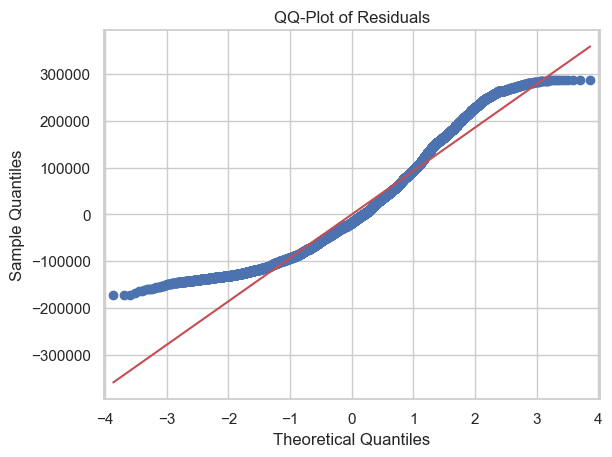

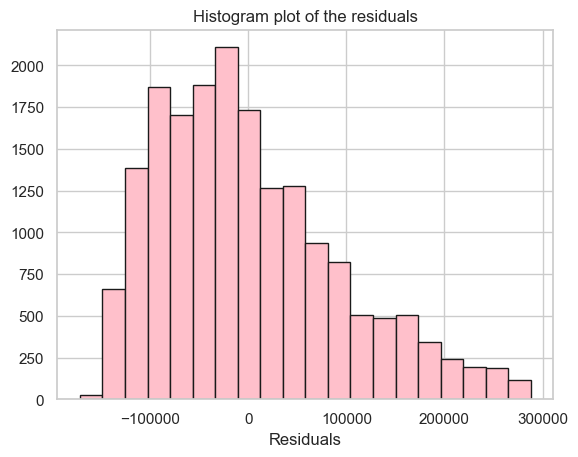

Shapiro-Wilk Test Statistic: 0.9478316307067871
p-value: 0.0
Residuals do not appear to be normally distributed (p <= 0.05)


2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST


c:\Users\joche\anaconda3\python\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


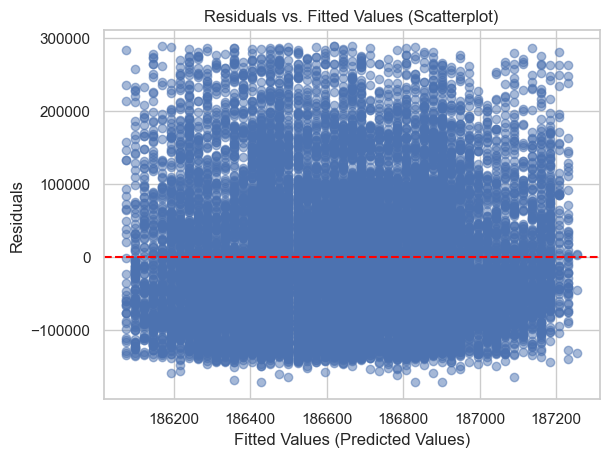

Breusch-Pagan Test Statistic: 29.76661377272473
p-value: 4.873121771698589e-08
Reject the null hypothesis - There is evidence of heteroscedasticity.


3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST


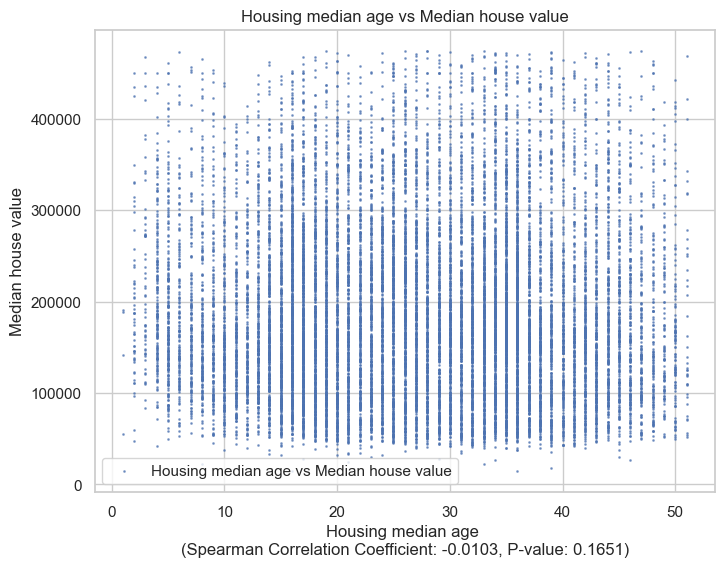

Correlation Coefficient: -0.0103, Interpretation: Very weak negative correlation
Following the p-value and an alpha of 0.05, we fail to reject the null hypothesis. We can conclude that there is not a significant relationship.


4.   LINEAR REGRESSION IS CALCULATED
Intercept (b0):  187277.97862644447
Coefficients (b1):  [-23.56674458]
Coefficient of Determination (R-squared):  8.32030603648004e-06
Predicted values (y):  [186311.74209857 186783.07699022 186288.17535399 ... 186877.34396855
 186853.77722396 186900.91071313]
MSE =  8608168013.309275
MSR =  1306693445.7276518
F-statistic (F): 0.15179692632710523
F-statistic (0.15179692632710523) is not greater than the critical value (3.8419654968806896).
Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.


C:\Users\joche\AppData\Local\Temp\ipykernel_46424\2629615054.py:207: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_data, y_values, 'k--', lw=2, color='red')


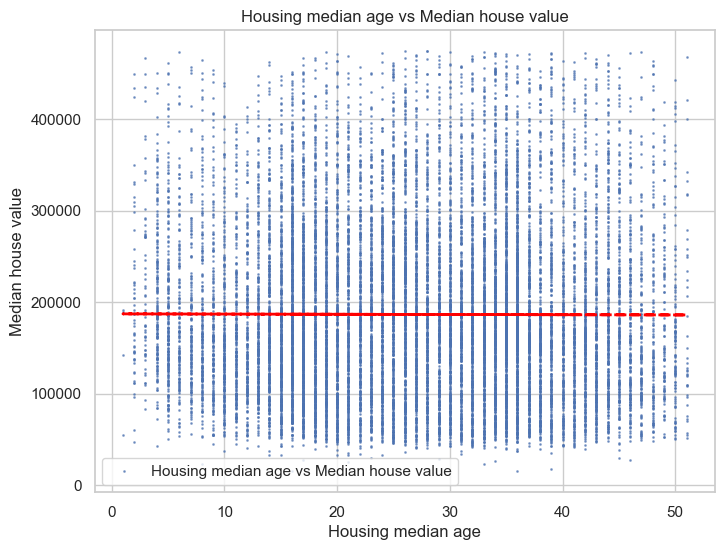

In [21]:
# Eliminate outliers
z_score_threshold = 3

# Calculate z-scores for 'housing_median_age' and 'median_house_value'
z_scores_age = np.abs(stats.zscore(df['housing_median_age']))
z_scores_house_value = np.abs(stats.zscore(df['median_house_value']))

# Detect outliers based on the z-scores
outliers_age = np.where(z_scores_age > z_score_threshold)
outliers_house_value = np.where(z_scores_house_value > z_score_threshold)

# Combine the outlier indices from both variables
outliers = np.union1d(outliers_age, outliers_house_value)

# Remove outliers from the DataFrame
df3 = df.drop(df.index[outliers])

# Check for normality
print('1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST')

# Fit a linear regression model
housing_age_lm = sm.OLS(df3['median_house_value'], sm.add_constant(df3['housing_median_age'])).fit()
residuals = housing_age_lm.resid
fitted_values = housing_age_lm.fittedvalues

# Create a QQ-plot for residuals
sm.qqplot(residuals, stats.norm, line='s')
plt.title('QQ-Plot of Residuals')
plt.show()

# Create a histogram of the residuals
plt.hist(residuals, bins=20, facecolor='pink', edgecolor='k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.show()

# Perform the Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test_statistic}')
print(f'p-value: {shapiro_p_value}')

# Check if residuals appear to be normally distributed
if shapiro_p_value > 0.05:
    print("Residuals appear to be normally distributed (p > 0.05)")
else:
    print("Residuals do not appear to be normally distributed (p <= 0.05)")

# Check for equal variance
print()
print()
print('2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST')

# Create a scatterplot of residuals vs. fitted values
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Scatterplot)')

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Perform the Breusch-Pagan test for heteroscedasticity
bp_test_statistic, bp_p_value, f_statistic, f_p_value = het_breuschpagan(residuals, housing_age_lm.model.exog)

print(f'Breusch-Pagan Test Statistic: {bp_test_statistic}')
print(f'p-value: {bp_p_value}')

# Check if there is evidence of heteroscedasticity
if bp_p_value < 0.05:
    print("Reject the null hypothesis - There is evidence of heteroscedasticity.")
else:
    print("Fail to reject the null hypothesis - There is no evidence of heteroscedasticity.")

# Pearson correlation test
print()
print()
"""Spearman correlation test"""
# Spearman correlation test
print('3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST')
spearman_corr, p_value = stats.spearmanr(df3['housing_median_age'], df3['median_house_value'])

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df3['housing_median_age'], df3['median_house_value'], label='Housing median age vs Median house value', alpha=0.6, s=1)
ax.set_title('Housing median age vs Median house value')
ax.set_xlabel(f'Housing median age \n(Spearman Correlation Coefficient: {spearman_corr:.4f}, P-value: {p_value:.4f})')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)
plt.show(block=False)

# Interpret the result
interpretation = ''
if spearman_corr >= 0.8:
    interpretation = "Very strong positive correlation"
elif 0.6 <= spearman_corr < 0.8:
    interpretation = "Strong positive correlation"
elif 0.4 <= spearman_corr < 0.6:
    interpretation = "Moderate positive correlation"
elif 0.2 <= spearman_corr < 0.4:
    interpretation = "Weak positive correlation"
elif 0.0 <= spearman_corr < 0.2:
    interpretation = "Very weak positive correlation"
elif spearman_corr <= -0.8:
    interpretation = "Very strong negative correlation"
elif -0.8 <= spearman_corr < -0.6:
    interpretation = "Strong negative correlation"
elif -0.6 <= spearman_corr < -0.4:
    interpretation = "Moderate negative correlation"
elif -0.4 <= spearman_corr < -0.2:
    interpretation = "Weak negative correlation"
elif -0.2 <= spearman_corr < 0.0:
    interpretation = "Very weak negative correlation"
else:
    interpretation = "No significant correlation"

print(f"Correlation Coefficient: {spearman_corr:.4f}, Interpretation: {interpretation}")

# Interpretation based on p-value
if p_value < 0.05:
    print("Following the p-value and an alpha of 0.05, we reject the null hypothesis. We can conclude that there is a significant relationship.")
else:
    print("Following the p-value and an alpha of 0.05, we fail to reject the null hypothesis. We can conclude that there is not a significant relationship.")

# Linear regression
print()
print()
print('4.   LINEAR REGRESSION IS CALCULATED')
x_data = df3['housing_median_age']
y_data = df3['median_house_value']

# Reshape the data
x_data = x_data.values.reshape(-1, 1)

# Set the model
model = LinearRegression()

# Fit the model
model.fit(x_data, y_data)

# Calculate the intercept and coefficient
b0 = model.intercept_
b1 = model.coef_

print("Intercept (b0): ", b0)
print("Coefficients (b1): ", b1)

# Calculate coefficient of determination
r_sq = model.score(x_data, y_data)
print("Coefficient of Determination (R-squared): ", r_sq)

# Predict values
y_pred = model.predict(x_data)
print("Predicted values (y): ", y_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_data, y_pred)
print("MSE = ", MSE)

# Calculate Sum of Squares Explained (SSR)
SSR = 0
y_avg = np.mean(y_data)
for i in y_pred:
    SSR = SSR + ((i - y_avg) * (i - y_avg))
MSR = SSR / 1
print("MSR = ", MSR)

# Calculate the F-statistic
F = MSR / MSE
print("F-statistic (F):", F)

# Define the degrees of freedom
dfn = 1  # Degrees of freedom for the numerator (predictors)
dfd = len(df) - 2  # Degrees of freedom for the denominator

# Set the alpha level
alpha = 0.05

# Calculate the critical F-value
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Calculate the F-statistic
F = MSR / MSE

# Compare F-statistic to critical value
if F > critical_value:
    print(f"F-statistic ({F}) is greater than the critical value ({critical_value}).")
    print("Reject the null hypothesis (H0) - The regression model is statistically significant.")
else:
    print(f"F-statistic ({F}) is not greater than the critical value ({critical_value}).")
    print("Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.")

# Create a scatter plot 
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df3['housing_median_age'], df3['median_house_value'], label='Housing median age vs Median house value', alpha=0.6, s=1)
ax.set_title('Housing median age vs Median house value')
ax.set_xlabel('Housing median age')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)

# Calculate the corresponding y-values using the regression equation
y_values = b0 + b1 * x_data

# Overlay the regression line
plt.plot(x_data, y_values, 'k--', lw=2, color='red')
plt.show()


Subquestion 6

1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST


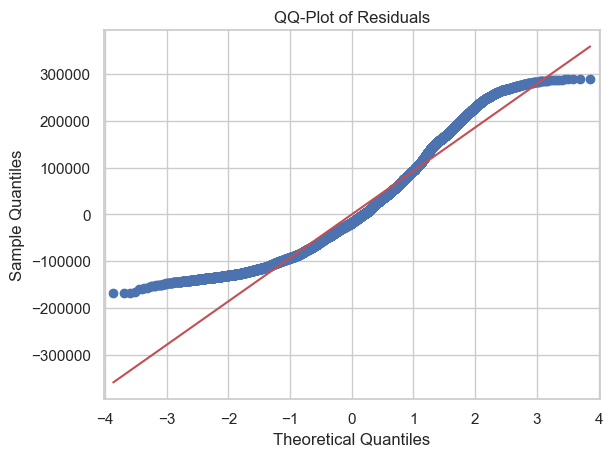

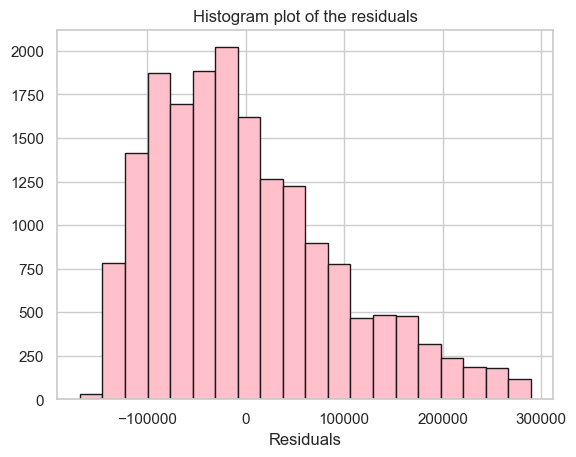

Shapiro-Wilk Test Statistic: 0.9462089538574219
p-value: 0.0
Residuals do not appear to be normally distributed (p <= 0.05)


2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST


c:\Users\joche\anaconda3\python\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


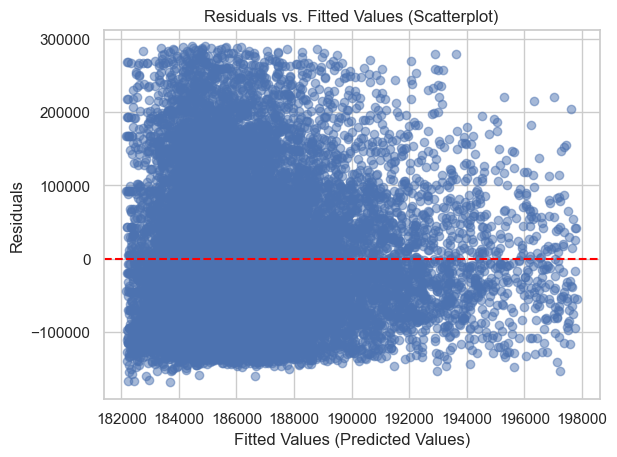

Breusch-Pagan Test Statistic: 101.85307856113988
p-value: 5.979625360154189e-24
Reject the null hypothesis - There is evidence of heteroscedasticity.


3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST


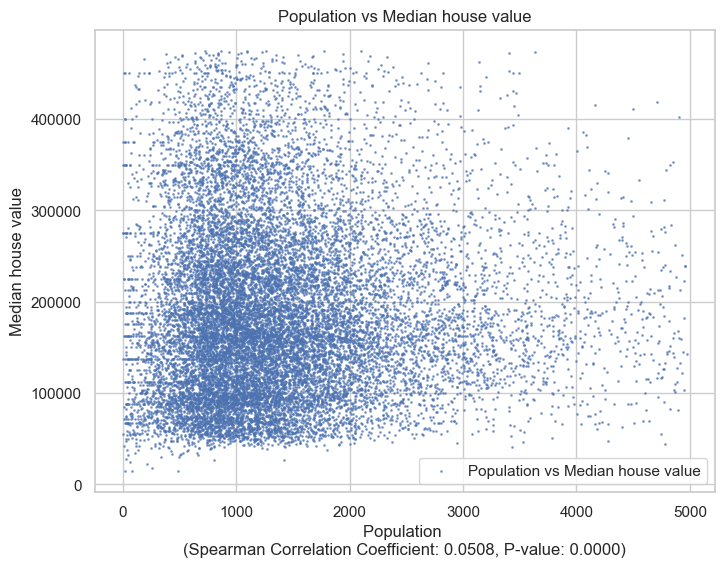

Correlation Coefficient: 0.0508, Interpretation: Very weak positive correlation
Following the p-value and an alpha of 0.05, we reject the null hypothesis. We can conclude that there is a significant relationship.


4.   LINEAR REGRESSION IS CALCULATED
Coefficient of Determination (R-squared):  0.000812565430715062
Predicted values (y):  [183175.81607284 189731.79120815 185963.4457119  ... 185335.91370039
 184497.10206692 186534.21603393]
MSE =  8633026342.935778
MSR =  125970688033.59377
F-statistic (F): 14.591718249148274
F-statistic (14.591718249148274) is greater than the critical value (3.8419654968806896).
Reject the null hypothesis (H0) - The regression model is statistically significant.


C:\Users\joche\AppData\Local\Temp\ipykernel_46424\2363787371.py:204: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_data, y_values, 'k--', lw=2, color='red')


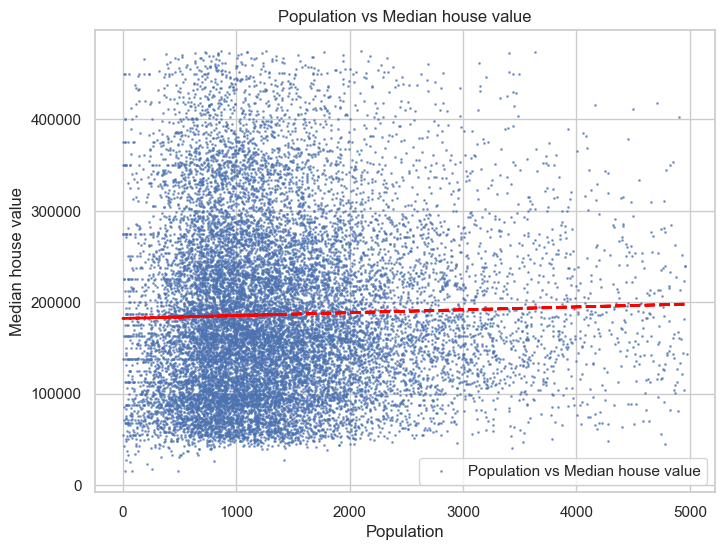

In [22]:
# Eliminate outliers
z_score_threshold = 3

# Calculate z-scores for 'population' and 'median_house_value'
z_scores_population = np.abs(stats.zscore(df['population']))
z_scores_house_value = np.abs(stats.zscore(df['median_house_value']))

# Detect outliers based on the z-scores
outliers_population = np.where(z_scores_population > z_score_threshold)
outliers_house_value = np.where(z_scores_house_value > z_score_threshold)

# Combine the outlier indices from both variables
outliers = np.union1d(outliers_population, outliers_house_value)

# Remove outliers from the DataFrame
df4 = df.drop(df.index[outliers])

# Check for normality
print('1.   NORMALITY IS CHECKED VISUALY AND BY USING THE SHAPIRO-WILLIS TEST')

# Fit a linear regression model
population_lm = sm.OLS(df4['median_house_value'], sm.add_constant(df4['population'])).fit()
residuals = population_lm.resid
fitted_values = population_lm.fittedvalues

# Create a QQ-plot for residuals
sm.qqplot(residuals, stats.norm, line='s')
plt.title('QQ-Plot of Residuals')
plt.show()

# Create a histogram of the residuals
plt.hist(residuals, bins=20, facecolor='pink', edgecolor='k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.show()

# Perform the Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test_statistic}')
print(f'p-value: {shapiro_p_value}')

# Check if residuals appear to be normally distributed
if shapiro_p_value > 0.05:
    print("Residuals appear to be normally distributed (p > 0.05)")
else:
    print("Residuals do not appear to be normally distributed (p <= 0.05)")

# Check for equal variance
print()
print()
print('2.   VARIANCE IS CHECKED VISUALY AND BY USING THE BREUSCH-PASAN TEST')

# Create a scatterplot of residuals vs. fitted values
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted Values (Predicted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Scatterplot)')

# Add a horizontal line at zero for reference
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Perform the Breusch-Pagan test for heteroscedasticity
bp_test_statistic, bp_p_value, f_statistic, f_p_value = het_breuschpagan(residuals, population_lm.model.exog)

print(f'Breusch-Pagan Test Statistic: {bp_test_statistic}')
print(f'p-value: {bp_p_value}')

# Check if there is evidence of heteroscedasticity
if bp_p_value < 0.05:
    print("Reject the null hypothesis - There is evidence of heteroscedasticity.")
else:
    print("Fail to reject the null hypothesis - There is no evidence of heteroscedasticity.")

print()
print()
"""Spearman correlation test"""

# Spearman correlation test
print('3.   CORRELATION IS TESTED USING SPEARMAN CORRELATION TEST')
spearman_corr, p_value = stats.spearmanr(df4['population'], df4['median_house_value'])

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df4['population'], df4['median_house_value'], label='Population vs Median house value', alpha=0.6, s=1)
ax.set_title('Population vs Median house value')
ax.set_xlabel(f'Population \n(Spearman Correlation Coefficient: {spearman_corr:.4f}, P-value: {p_value:.4f})')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)
plt.show(block=False)

# Interpret the result
interpretation = ''
if spearman_corr >= 0.8:
    interpretation = "Very strong positive correlation"
elif 0.6 <= spearman_corr < 0.8:
    interpretation = "Strong positive correlation"
elif 0.4 <= spearman_corr < 0.6:
    interpretation = "Moderate positive correlation"
elif 0.2 <= spearman_corr < 0.4:
    interpretation = "Weak positive correlation"
elif 0.0 <= spearman_corr < 0.2:
    interpretation = "Very weak positive correlation"
elif spearman_corr <= -0.8:
    interpretation = "Very strong negative correlation"
elif -0.8 <= spearman_corr < -0.6:
    interpretation = "Strong negative correlation"
elif -0.6 <= spearman_corr < -0.4:
    interpretation = "Moderate negative correlation"
elif -0.4 <= spearman_corr < -0.2:
    interpretation = "Weak negative correlation"
elif -0.2 <= spearman_corr < 0.0:
    interpretation = "Very weak negative correlation"
else:
    interpretation = "No significant correlation"

print(f"Correlation Coefficient: {spearman_corr:.4f}, Interpretation: {interpretation}")

# Interpretation based on p-value
if p_value < 0.05:
    print("Following the p-value and an alpha of 0.05, we reject the null hypothesis. We can conclude that there is a significant relationship.")
else:
    print("Following the p-value and an alpha of 0.05, we fail to reject the null hypothesis. We can conclude that there is not a significant relationship.")

# Linear regression
print()
print()
print('4.   LINEAR REGRESSION IS CALCULATED')
x_data = df4['population']
y_data = df4['median_house_value']

# Rshape the data
x_data = x_data.values.reshape(-1, 1)

# Create regression model
model = LinearRegression()

# Fit the data in the model
model.fit(x_data, y_data)

# Calculate intercept and coefficient
b0 = model.intercept_
b1 = model.coef_

# Calculate coefficient of determination
r_sq = model.score(x_data, y_data)
print("Coefficient of Determination (R-squared): ", r_sq)

# Predict values
y_pred = model.predict(x_data)
print("Predicted values (y): ", y_pred)

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_data, y_pred)
print("MSE = ", MSE)

# Calculate Sum of Squares Explained (SSR)
SSR = 0
y_avg = np.mean(y_data)
for i in y_pred:
    SSR = SSR + ((i - y_avg) * (i - y_avg))
MSR = SSR / 1
print("MSR = ", MSR)

# Calculate the F-statistic
F = MSR / MSE
print("F-statistic (F):", F)

# Define the degrees of freedom
dfn = 1  # Degrees of freedom for the numerator (predictors)
dfd = len(df) - 2  # Degrees of freedom for the denominator

# Set the alpha level
alpha = 0.05

# Calculate the critical F-value
critical_value = stats.f.ppf(1 - alpha, dfn, dfd)

# Calculate the F-statistic
F = MSR / MSE

# Compare F-statistic to critical value
if F > critical_value:
    print(f"F-statistic ({F}) is greater than the critical value ({critical_value}).")
    print("Reject the null hypothesis (H0) - The regression model is statistically significant.")
else:
    print(f"F-statistic ({F}) is not greater than the critical value ({critical_value}).")
    print("Fail to reject the null hypothesis (H0) - The regression model is not statistically significant.")

# Create a scatter plot of observed vs. predicted values
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df4['population'], df4['median_house_value'], label='Population vs Median house value', alpha=0.6, s=1)
ax.set_title('Population vs Median house value')
ax.set_xlabel('Population')        
ax.set_ylabel('Median house value')
ax.legend()
ax.grid(True)

# Calculate the corresponding y-values using the regression equation
y_values = b0 + b1 * x_data

# Overlay the regression line
plt.plot(x_data, y_values, 'k--', lw=2, color='red')
plt.show()


<span style="font-size: 32px;">#4 Multi level analysis</span>

4.1 Random intercept model on county to predict house value

In [23]:
# Build the formula
predictors = df.columns.drop(['median_house_value', 'county', 'longitude', 'latitude', 'county_numeric',
       'ocean_proximity_numeric', 'total_rooms'])
formula = "median_house_value ~ " + " + ".join(predictors)

# Multilevel model
mlm_model = smf.mixedlm(formula, df, groups=df["county"])
mlm_result = mlm_model.fit()

# Results
print(mlm_result.summary())

                          Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         median_house_value
No. Observations:           18357           Method:                     REML              
No. Groups:                 60              Scale:                      3032008421.5666   
Min. group size:            1               Log-Likelihood:             -226488.8650      
Max. group size:            5142            Converged:                  Yes               
Mean group size:            305.9                                                         
------------------------------------------------------------------------------------------
                                  Coef.       Std.Err.    z    P>|z|   [0.025     0.975]  
------------------------------------------------------------------------------------------
Intercept                          33160.444  5481.446   6.050 0.000  22417.007  43903.881
ocean_proximity[T.INLAND] 

4.2 Random slope and intercept model on county to predict house value

In [24]:
# Build the formula
model = smf.mixedlm("median_house_value ~ median_income", df, groups=df["county"], 
                    re_formula="~median_income")

# Create the model
result = model.fit()

# Results
print(result.summary())

c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                      Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      median_house_value
No. Observations:        18357        Method:                  REML              
No. Groups:              60           Scale:                   3312341991.8809   
Min. group size:         1            Log-Likelihood:          -227642.5042      
Max. group size:         5142         Converged:               No                
Mean group size:         305.9                                                   
---------------------------------------------------------------------------------
                              Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
---------------------------------------------------------------------------------
Intercept                     63232.918 4877.916 12.963 0.000 53672.377 72793.458
median_income                    23.172  110.968  0.209 0.835  -194.321   240.664
Group Var                 893826485.56

c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 3949.089733
  warnings.warn(msg, ConvergenceWarning)
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


4.3 Random slope and intecept model on county to predict house value with total rooms and housing median age

In [25]:
# Build the formula 
model = smf.mixedlm("median_house_value ~ total_rooms + housing_median_age", df, 
                    groups=df["county"], 
                    re_formula="~total_rooms + housing_median_age")

# Create the model
result = model.fit()

# Results
print(result.summary())

c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

                             Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           median_house_value
No. Observations:            18357             Method:                       REML              
No. Groups:                  60                Scale:                        5254542993.8396   
Min. group size:             1                 Log-Likelihood:               -232249.4251      
Max. group size:             5142              Converged:                    No                
Mean group size:             305.9                                                             
-----------------------------------------------------------------------------------------------
                                         Coef.      Std.Err.   z    P>|z|   [0.025     0.975]  
-----------------------------------------------------------------------------------------------
Intercept                                163292.323 7295.230 22.383 0

c:\Users\joche\anaconda3\python\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
